# Short Notebook on Regression

In [5]:
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

Let's first generate two random vectors linearly correlated.

In [52]:
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + 1.6*np.random.rand(1000, 1)

In [53]:
np.random.rand?

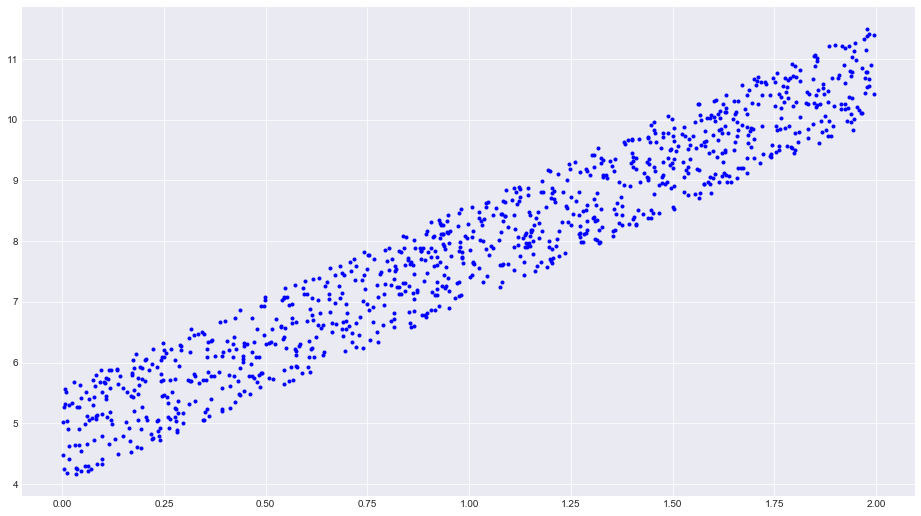

In [54]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X, y, "b.")

In [55]:
from sklearn import linear_model

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
lin_reg?

In [59]:
lin_reg.coef_, lin_reg.intercept_

(array([[3.00975876]]), array([4.80412829]))

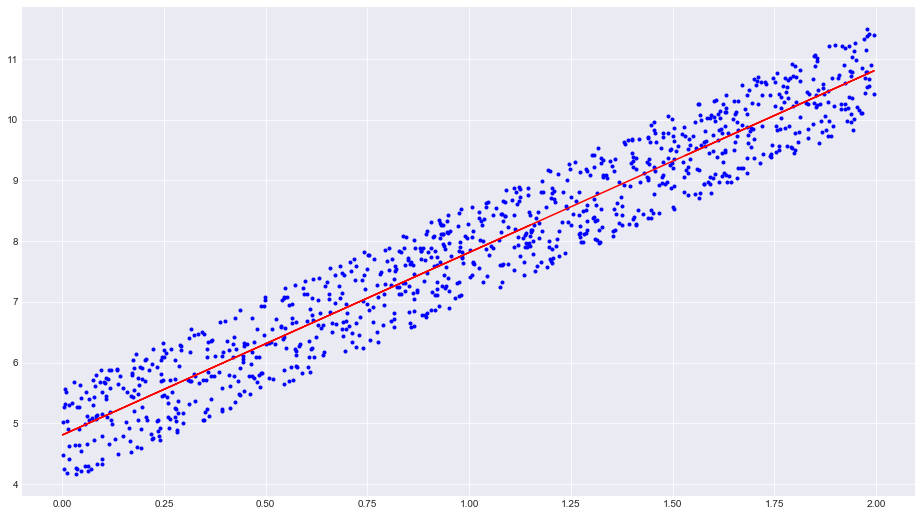

In [61]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X, y, "b.")
ax.plot(X, lin_reg.intercept_ + lin_reg.coef_*X, "r-")

In [62]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_test, lin_reg.predict(X_test))

0.22243985749834813

Getting to the case of a polynomial model.

In [65]:
m = 1000
X = 6 * np.random.rand(m, 1) - 3
y = 0.8*X**3 + 0.5 * X**2 + X + 2 + 1.4*np.random.rand(m, 1)

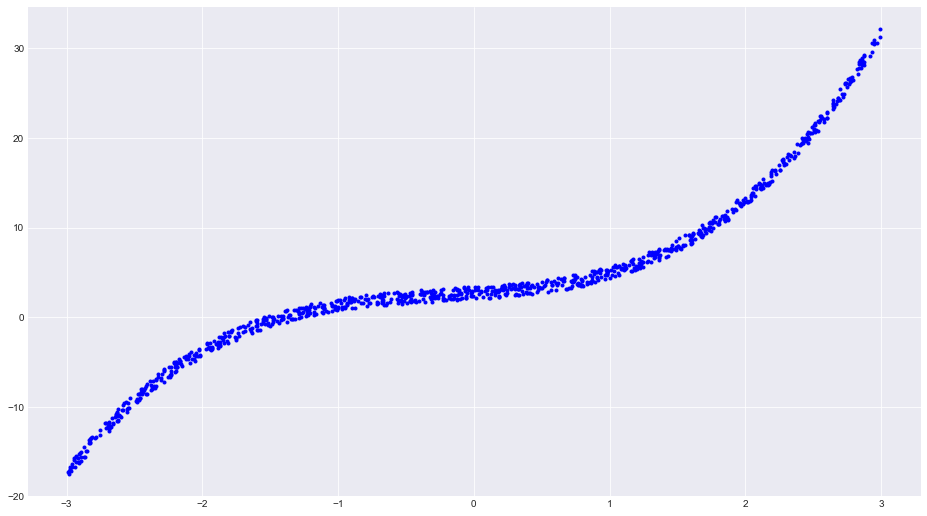

In [66]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X, y, "b.")

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
linear_reg.coef_

array([[5.20143801]])

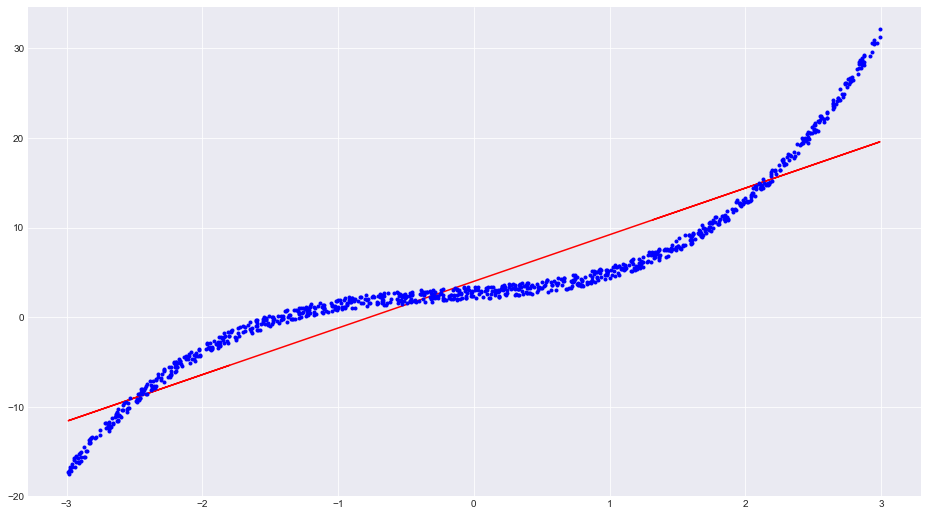

In [70]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X, linear_reg.coef_*X + linear_reg.intercept_, "r-")
ax.plot(X, y, "b.")

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
mean_squared_error?

In [73]:
mean_squared_error(y_test, linear_reg.predict(X_test))

11.835281181305461

In [79]:
def plot_learning_curve(model, X, y, metric=mean_squared_error, min_size=10, max_size=None):
    """Plots learning curve of model against dataset X
    
    It assumes names mean_squared_error, train_test_split and plt are within the 
    environment name space. Respectively standing for sklearn.metrics.mean_squared_error
    sklearn.model_selection.train_test_split and matplotlib.pyplot.
    
    """
    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Filling in vectors of errors against size of dataset
    train_errors, test_errors = [], []
    if not max_size:
        max_size = X_train.shape[0]
    for m in range(min_size, max_size):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(metric(y_train_predict, y_train[:m]))
        test_errors.append(metric(y_test_predict, y_test))
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(train_errors, "r+-", label="train")
    ax.plot(test_errors, "b-", label="test")
    ax.legend()

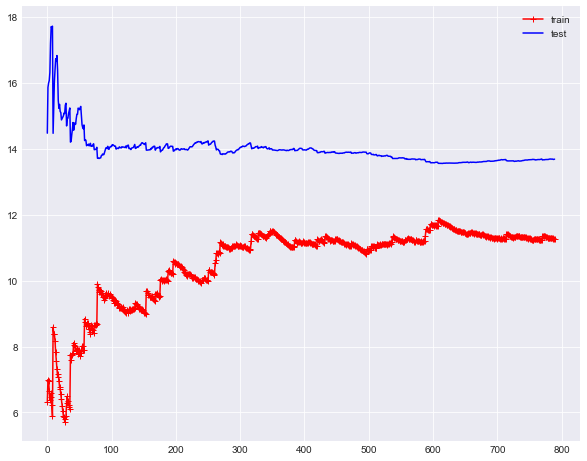

In [80]:
plot_learning_curve(linear_reg, X, y)